In [7]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC ,SVR
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [9]:
Data = pd.read_csv('WineQT.csv')
del Data['Id']
#Data.drop(columns="Id",inplace=True)
#Data.drop('Id',axis=1)


In [8]:
Data['quality'] = Data['quality']-3
Data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,-1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,-1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,-1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,-1
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0


In [10]:
Data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


In [11]:
Data.head(10).style.background_gradient(cmap='Reds')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7
9,6.700000,0.580000,0.080000,1.800000,0.097000,15.000000,65.000000,0.995900,3.280000,0.540000,9.200000,5


In [12]:
Data.sample(10).style.background_gradient(cmap='Reds')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
856,6.200000,0.390000,0.430000,2.000000,0.071000,14.000000,24.000000,0.994280,3.450000,0.870000,11.200000,7
559,7.100000,0.520000,0.030000,2.600000,0.076000,21.000000,92.000000,0.997450,3.500000,0.600000,9.800000,5
923,5.200000,0.645000,0.000000,2.150000,0.080000,15.000000,28.000000,0.994440,3.780000,0.610000,12.500000,6
1007,6.200000,0.580000,0.000000,1.600000,0.065000,8.000000,18.000000,0.996600,3.560000,0.840000,9.400000,5
805,8.200000,0.510000,0.240000,2.000000,0.079000,16.000000,86.000000,0.997640,3.340000,0.640000,9.500000,6
253,11.900000,0.430000,0.660000,3.100000,0.109000,10.000000,23.000000,1.000000,3.150000,0.850000,10.400000,7
478,10.800000,0.400000,0.410000,2.200000,0.084000,7.000000,17.000000,0.998400,3.080000,0.670000,9.300000,6
292,11.900000,0.380000,0.510000,2.000000,0.121000,7.000000,20.000000,0.999600,3.240000,0.760000,10.400000,6
1130,7.400000,0.350000,0.330000,2.400000,0.068000,9.000000,26.000000,0.994700,3.360000,0.600000,11.900000,6
694,7.700000,0.390000,0.120000,1.700000,0.097000,19.000000,27.000000,0.995960,3.160000,0.490000,9.400000,5


In [13]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [14]:
Data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
Data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [19]:
Data.describe().T.style.background_gradient(cmap = 'Blues')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


In [20]:
Data.mean()

fixed acidity            8.311111
volatile acidity         0.531339
citric acid              0.268364
residual sugar           2.532152
chlorides                0.086933
free sulfur dioxide     15.615486
total sulfur dioxide    45.914698
density                  0.996730
pH                       3.311015
sulphates                0.657708
alcohol                 10.442111
quality                  5.657043
dtype: float64

In [21]:
Data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
Data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
Data.duplicated().sum()

125

In [24]:
Data.drop_duplicates(inplace = True)

In [25]:
Data.duplicated().sum()

0

In [26]:
Data['quality'].value_counts()

5    433
6    409
7    122
4     33
8     15
3      6
Name: quality, dtype: int64

<Figure size 1200x800 with 0 Axes>

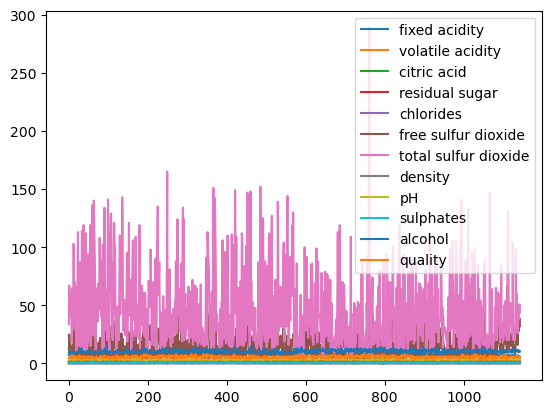

In [27]:
plt.figure(figsize = (12, 8))
Data.plot()
plt.show()

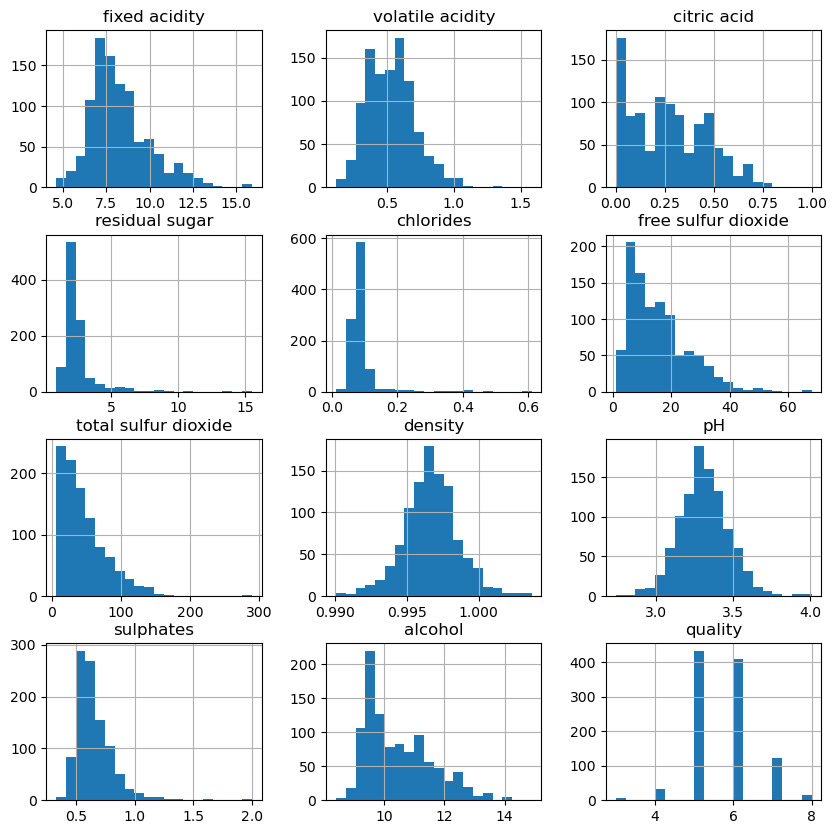

In [28]:
Data.hist(bins=20, figsize=(10, 10))
plt.show()

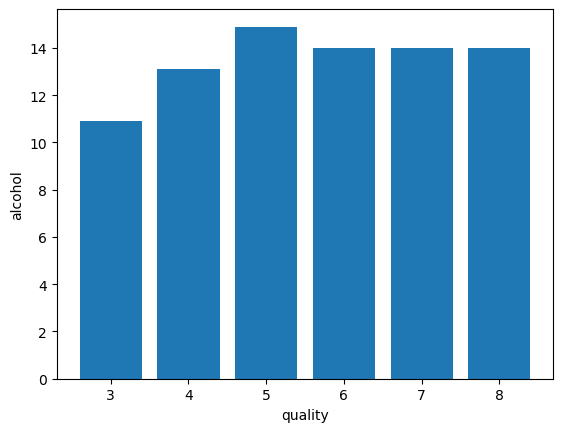

In [29]:
plt.bar(Data['quality'], Data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

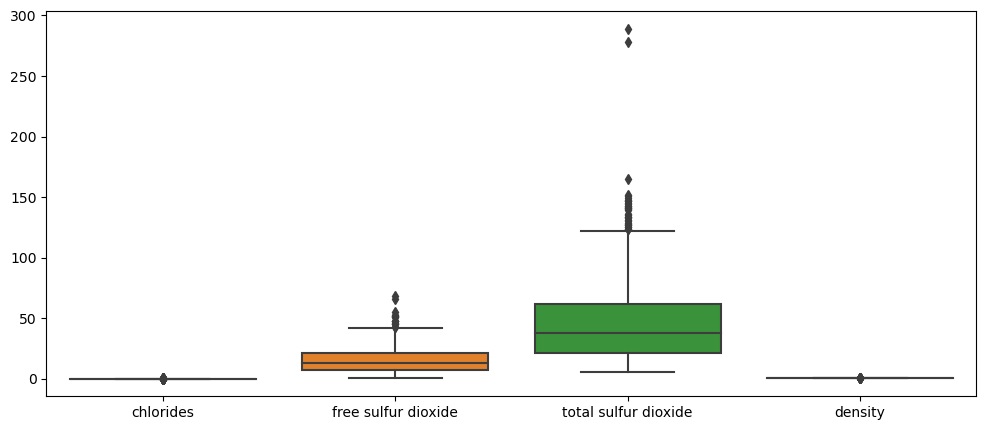

In [30]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=Data[Data.columns[4:8]])
plt.show()

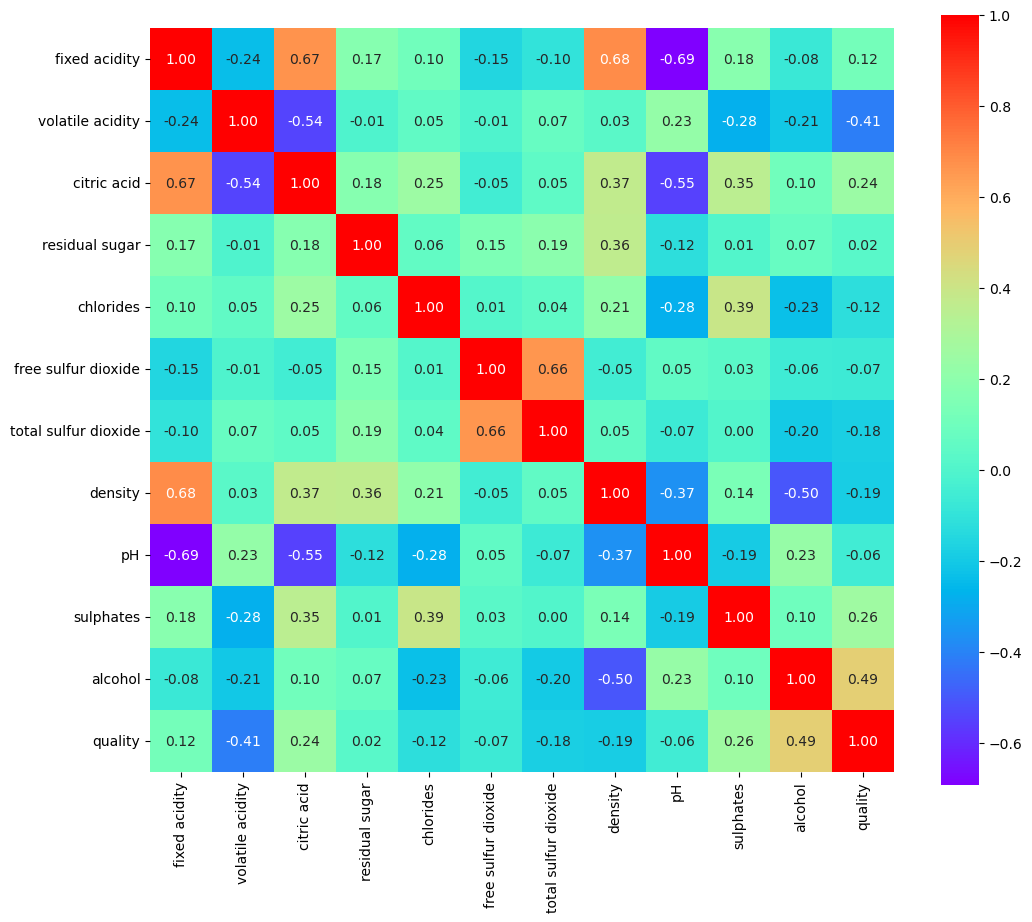

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(Data.corr(), cbar=True, square=True, fmt='.2f', annot=True, cmap='rainbow')

plt.show()

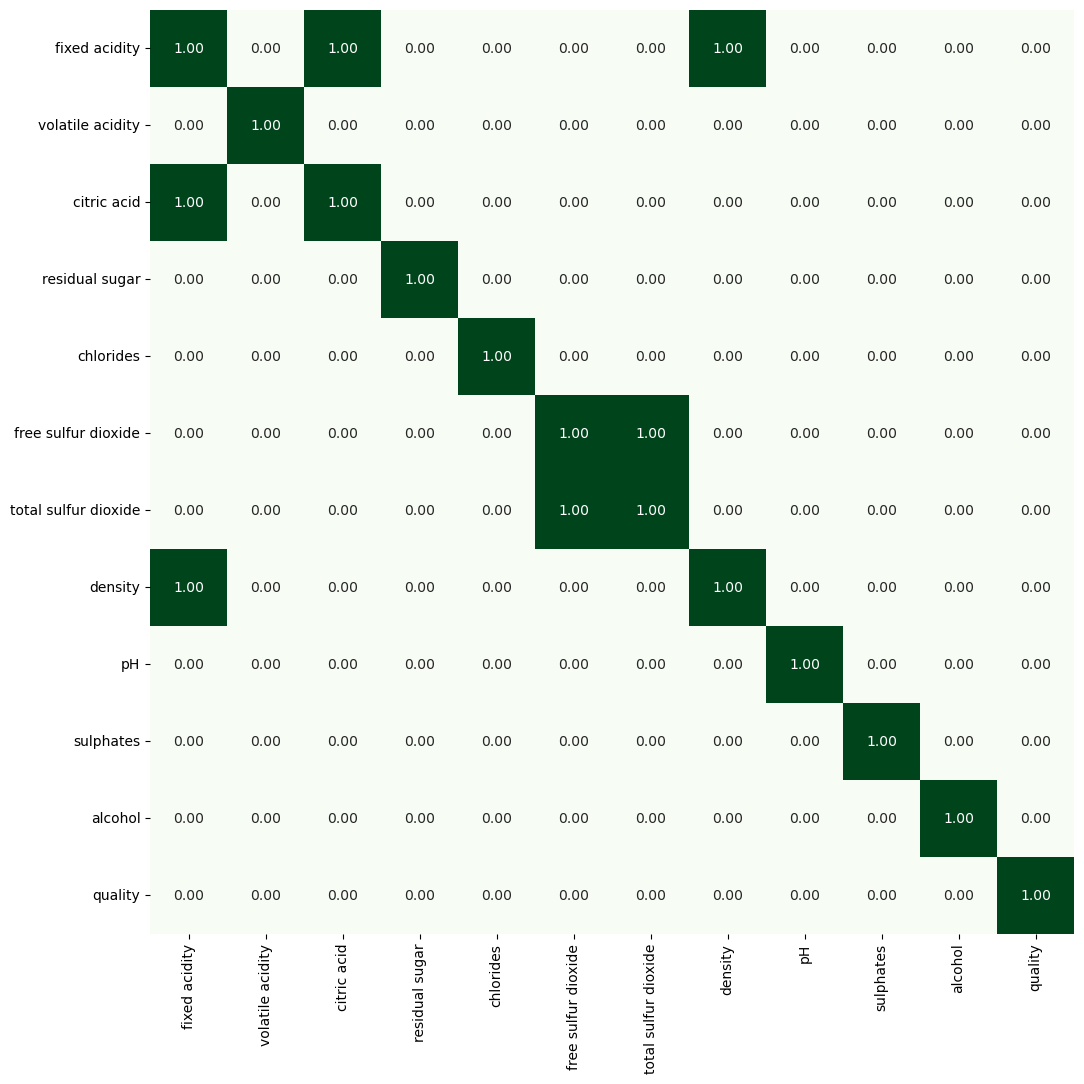

In [32]:
plt.figure(figsize=(12, 12))
sns.heatmap(Data.corr() > 0.6, cbar=False, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Greens')
plt.show()

In [33]:
Data = Data.drop('total sulfur dioxide', axis=1)

In [34]:
Data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6


In [35]:
X = Data.drop(columns="quality")           
y = Data["quality"]

In [36]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
norm = MinMaxScaler()
x_train = norm.fit_transform(X_train)
x_test = norm.fit_transform(X_test)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (814, 10)
X Test  :  (204, 10)
Y Train :  (814,)
Y Test  :  (204,)


In [37]:
Lo_model=LogisticRegression(solver='liblinear')

Lo_model.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", Lo_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Lo_model.score(X_test,y_test))

y_pred_Lo=Lo_model.predict(X_test)

print( " Model Evaluation Logistic R : mean absolute error is ", mean_absolute_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : mean squared  error is " , mean_squared_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : median absolute error is " ,median_absolute_error(y_test,y_pred_Lo)) 

print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_Lo))

Score the X-train with Y-train is :  0.5896805896805897
Score the X-test  with Y-test  is :  0.5588235294117647
 Model Evaluation Logistic R : mean absolute error is  0.4803921568627451
 Model Evaluation Logistic R : mean squared  error is  0.5588235294117647
 Model Evaluation Logistic R : median absolute error is  0.0
 Model Evaluation Logistic R : accuracy score  0.5588235294117647


In [38]:
Tree_model=DecisionTreeClassifier(max_depth=50)
Tree_model.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.39705882352941174


In [39]:
# Select  Important columns

print("The Important columns \n",Tree_model.feature_importances_)

The Important columns 
 [0.1120131  0.09917741 0.07087062 0.07810323 0.10219118 0.06162147
 0.07132806 0.11003454 0.08178191 0.21287846]


In [40]:
Data.head(0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality


In [41]:
print("The classes ",Tree_model.classes_)

y_pred_T =Tree_model.predict(X_test)

print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

The classes  [3 4 5 6 7 8]
 Model Evaluation Decision Tree : accuracy score  0.39705882352941174


In [42]:
svc_model=SVC(C=50,kernel="rbf")

svc_model.fit(X_train,y_train)

y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.6044226044226044
Score the X-test  with Y-test  is :  0.5294117647058824
 Model Evaluation Decision Tree : accuracy score  0.5294117647058824


In [43]:
svr_model=SVR(degree=1,coef0=1, tol=0.001, C=1.5,epsilon=0.001)

svr_model.fit(X_train,y_train)

y_pred_svr =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svr_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svr_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svr))


Score the X-train with Y-train is :  0.3103755729965214
Score the X-test  with Y-test  is :  0.2210544075253903
 Model Evaluation Decision Tree : accuracy score  0.5294117647058824


In [44]:
K_model = KNeighborsClassifier(n_neighbors = 8)
K_model.fit(X_train, y_train)

y_pred_k = K_model.predict(X_test)

print("Score the X-train with Y-train is : ", K_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test,y_test))
print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))

Score the X-train with Y-train is :  0.6130221130221131
Score the X-test  with Y-test  is :  0.5735294117647058
 Model Evaluation K Neighbors Classifier : accuracy score  0.5735294117647058


In [46]:
regression_model = LinearRegression()

regression_model.fit(x_train, y_train)

LinearRegression()

In [47]:
y_predict = regression_model.predict(x_test)
y_predict = np.round(y_predict)

sum = 0
for i,n in enumerate(y_test):
    if n == y_predict[i]:
        sum += 1
print(sum/len(y_test))

0.5392156862745098
